In [41]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

In [74]:
data = pd.read_csv('hourly(2).csv', error_bad_lines=False, parse_dates = [['Date', 'Hour (PST)']])

b'Skipping line 181: expected 16 fields, saw 26\nSkipping line 182: expected 16 fields, saw 26\nSkipping line 183: expected 16 fields, saw 26\nSkipping line 184: expected 16 fields, saw 26\nSkipping line 185: expected 16 fields, saw 26\nSkipping line 186: expected 16 fields, saw 26\nSkipping line 187: expected 16 fields, saw 26\nSkipping line 188: expected 16 fields, saw 26\nSkipping line 189: expected 16 fields, saw 26\nSkipping line 190: expected 16 fields, saw 26\nSkipping line 191: expected 16 fields, saw 26\nSkipping line 192: expected 16 fields, saw 26\nSkipping line 193: expected 16 fields, saw 26\n'


# Part 1

In [76]:
KingCitydata2020 = data.loc[data['Stn Id'] == 113] #select all rows with pomona as station (78)
print(KingCitydata2020) 

    Date_Hour (PST)  Stn Id             Stn Name  CIMIS Region  Jul  ETo (in)  \
0     2/5/2020 0100     113  King City-Oasis Rd.  Monterey Bay   36      0.00   
1     2/5/2020 0200     113  King City-Oasis Rd.  Monterey Bay   36      0.00   
2     2/5/2020 0300     113  King City-Oasis Rd.  Monterey Bay   36      0.00   
3     2/5/2020 0400     113  King City-Oasis Rd.  Monterey Bay   36      0.00   
4     2/5/2020 0500     113  King City-Oasis Rd.  Monterey Bay   36      0.00   
..              ...     ...                  ...           ...  ...       ...   
174  2/12/2020 0700     113  King City-Oasis Rd.  Monterey Bay   43      0.00   
175  2/12/2020 0800     113  King City-Oasis Rd.  Monterey Bay   43      0.00   
176  2/12/2020 0900     113  King City-Oasis Rd.  Monterey Bay   43      0.00   
177  2/12/2020 1000     113  King City-Oasis Rd.  Monterey Bay   43      0.01   
178  2/12/2020 1100     113  King City-Oasis Rd.  Monterey Bay   43      0.01   

     Precip (in)  Sol Rad (

In [77]:
KingCitydata2020days = KingCitydata2020.loc[(KingCitydata2020['Sol Rad (Ly/day)'] > 0) & (KingCitydata2020['Precip (in)'] == 0),['Sol Rad (Ly/day)', 'Stn Name']]
#selecting multiple conditions and print only the columns following the last condition
print(KingCitydata2020days)

     Sol Rad (Ly/day)             Stn Name
6                   1  King City-Oasis Rd.
7                  69  King City-Oasis Rd.
8                 303  King City-Oasis Rd.
9                 484  King City-Oasis Rd.
10                807  King City-Oasis Rd.
..                ...                  ...
174                 1  King City-Oasis Rd.
175               112  King City-Oasis Rd.
176               375  King City-Oasis Rd.
177               647  King City-Oasis Rd.
178               871  King City-Oasis Rd.

[87 rows x 2 columns]


In [78]:
KingCitydata2020light = KingCitydata2020.loc[KingCitydata2020['Sol Rad (Ly/day)'] > 0]
KingCitydata2020dark = KingCitydata2020.loc[KingCitydata2020['Sol Rad (Ly/day)'] == 0]

In [79]:
print(KingCitydata2020light)
averagedaytemp = np.mean(KingCitydata2020light['Air Temp (F)'], axis = 0)
print(averagedaytemp)

    Date_Hour (PST)  Stn Id             Stn Name  CIMIS Region  Jul  ETo (in)  \
6     2/5/2020 0700     113  King City-Oasis Rd.  Monterey Bay   36      0.00   
7     2/5/2020 0800     113  King City-Oasis Rd.  Monterey Bay   36      0.00   
8     2/5/2020 0900     113  King City-Oasis Rd.  Monterey Bay   36      0.00   
9     2/5/2020 1000     113  King City-Oasis Rd.  Monterey Bay   36      0.00   
10    2/5/2020 1100     113  King City-Oasis Rd.  Monterey Bay   36      0.01   
..              ...     ...                  ...           ...  ...       ...   
174  2/12/2020 0700     113  King City-Oasis Rd.  Monterey Bay   43      0.00   
175  2/12/2020 0800     113  King City-Oasis Rd.  Monterey Bay   43      0.00   
176  2/12/2020 0900     113  King City-Oasis Rd.  Monterey Bay   43      0.00   
177  2/12/2020 1000     113  King City-Oasis Rd.  Monterey Bay   43      0.01   
178  2/12/2020 1100     113  King City-Oasis Rd.  Monterey Bay   43      0.01   

     Precip (in)  Sol Rad (

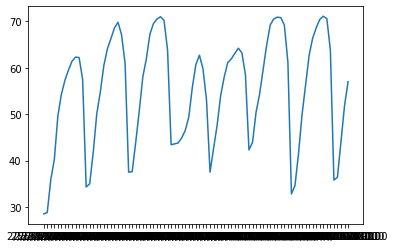

In [83]:
plt.plot(KingCitydata2020light['Date_Hour (PST)'], KingCitydata2020light['Air Temp (F)']) 
# plot of temp over time, in this case only light data

In [81]:
#ava_inflammation = np.mean(data, axis=0) # will give average infl per day
#print(ava_inflammation)

ava_plot = plt.plot(ava_inflammation)
plt.xlabel('time (days)')
plt.ylabel('mean inflammation score', size=30)
plt.title('patient data')
plt.show()

fig = plt.figure(figsize=(10.0, 3.0))#an empty figure to hold multiple figures

fig.suptitle('This is my super title', va ='bottom', fontsize=15) #super title goes over everything
#va = vertical alignment


#put in width and height in pixels (10.,3.0)
#next create paneled figures
subplot1 = fig.add_subplot(1, 3, 1) #put in rows, cols, position
subplot2 = fig.add_subplot(1, 3, 2)
subplot3 = fig.add_subplot(1, 3, 3)

#now adding in 3 subplots

subplot1.set_ylabel('average') #labeleing scheme different from above
subplot1.plot(np.mean(data, axis=0), '--') #modify line types
subplot2.set_ylabel('max')
subplot2.plot(np.max(data, axis=0), '-o')
subplot2.set_xlabel('Time(days)')

subplot3.set_ylabel('min')
subplot3.plot(np.min(data, axis=0))

fig.tight_layout() #automatic reformating
plt.show()
            

NameError: name 'ava_inflammation' is not defined

In [101]:
def plotting_light_dark_tempscimis(filename, stationID):
    data = pd.read_csv(filename, error_bad_lines=False, parse_dates = [['Date', 'Hour (PST)']])
    specificcity = data.loc[data['Stn Id'] == stationID]
    specificcitylighttemps = specificcity.loc[specificcity['Sol Rad (Ly/day)'] > 0]
    specificcitydarktemps = specificcity.loc[specificcity['Sol Rad (Ly/day)'] == 0]
    return
    fig = plt.figure(figsize = (10.0, 3.0)) 
    axes1 = fig.add_subplot(1,3,1) 
    axes2 = fig.add_subplot(1,3,2) 
    axes3 = fig.add_subplot(1,3,3)
    axes1.plot(specificcitylighttemps['Date_Hour (PST)'], specificcitylighttemps['Air Temp (F)']) 
    axes2.plot(specificcitydarktemps['Date_Hour (PST)'], specificcitydarktemps['Air Temp (F)']) 
    

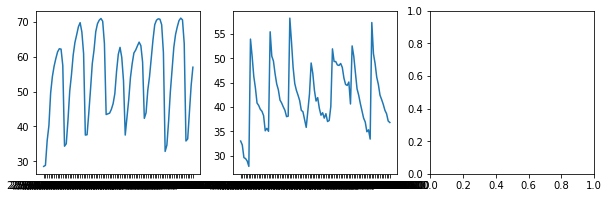

In [102]:
fig = plt.figure(figsize = (10.0, 3.0)) 
axes1 = fig.add_subplot(1,3,1) 
axes2 = fig.add_subplot(1,3,2) 
axes3 = fig.add_subplot(1,3,3)

axes1.plot(KingCitydata2020light['Date_Hour (PST)'], KingCitydata2020light['Air Temp (F)']) 
axes2.plot(KingCitydata2020dark['Date_Hour (PST)'], KingCitydata2020dark['Air Temp (F)'])     

In [103]:
plotting_light_dark_tempscimis('hourly(2).csv', '113')

b'Skipping line 181: expected 16 fields, saw 26\nSkipping line 182: expected 16 fields, saw 26\nSkipping line 183: expected 16 fields, saw 26\nSkipping line 184: expected 16 fields, saw 26\nSkipping line 185: expected 16 fields, saw 26\nSkipping line 186: expected 16 fields, saw 26\nSkipping line 187: expected 16 fields, saw 26\nSkipping line 188: expected 16 fields, saw 26\nSkipping line 189: expected 16 fields, saw 26\nSkipping line 190: expected 16 fields, saw 26\nSkipping line 191: expected 16 fields, saw 26\nSkipping line 192: expected 16 fields, saw 26\nSkipping line 193: expected 16 fields, saw 26\n'
/home/eebc177student/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


# Part 2

In [96]:
import csv
input_file = csv.DictReader(open('hourly(2).csv'))
for row in input_file:
    print(row['Stn Id']) 

113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
                                                                                                                                                                                                                                        

In [132]:
stationair = dict()
input_file = csv.DictReader(open('hourly(2).csv'))
for row in input_file:
    stationair[row['Stn Name']] = row['Air Temp (F)']
    print(stationair)
    
    


{'King City-Oasis Rd.': '33.0'}
{'King City-Oasis Rd.': '32.2'}
{'King City-Oasis Rd.': '29.6'}
{'King City-Oasis Rd.': '29.4'}
{'King City-Oasis Rd.': '28.9'}
{'King City-Oasis Rd.': '27.8'}
{'King City-Oasis Rd.': '28.5'}
{'King City-Oasis Rd.': '28.8'}
{'King City-Oasis Rd.': '35.9'}
{'King City-Oasis Rd.': '40.2'}
{'King City-Oasis Rd.': '49.6'}
{'King City-Oasis Rd.': '54.3'}
{'King City-Oasis Rd.': '57.3'}
{'King City-Oasis Rd.': '59.5'}
{'King City-Oasis Rd.': '61.4'}
{'King City-Oasis Rd.': '62.3'}
{'King City-Oasis Rd.': '62.2'}
{'King City-Oasis Rd.': '57.5'}
{'King City-Oasis Rd.': '53.9'}
{'King City-Oasis Rd.': '50.4'}
{'King City-Oasis Rd.': '46.3'}
{'King City-Oasis Rd.': '43.9'}
{'King City-Oasis Rd.': '40.8'}
{'King City-Oasis Rd.': '40.3'}
{'King City-Oasis Rd.': '39.5'}
{'King City-Oasis Rd.': '39.1'}
{'King City-Oasis Rd.': '38.2'}
{'King City-Oasis Rd.': '35.1'}
{'King City-Oasis Rd.': '35.6'}
{'King City-Oasis Rd.': '35.0'}
{'King City-Oasis Rd.': '34.3'}
{'King C

In [22]:
print(row)

OrderedDict([('Stn Id', '                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [141]:

input_file = csv.DictReader(open('hourly(2).csv', newline = ''))
for row in input_file:
    if (row['Wind Speed (mph)']) > 4:
        print(row)

TypeError: '>' not supported between instances of 'str' and 'int'